# Лабораторная работа "датчик случайных чисел"

### Генереция равномерно случайных чисел происходит по линейному конгруэнтному методу

Запишем метод в функцию gentrate().

Линейный конгруэнтный метод был предложен Д. Г. Лемером в 1949 году.Суть метода заключается в вычислении последовательности случайных чисел Xn, полагая что Xn+1 = (a* Xn +c)mod(m)
где m - модуль (натуральное число) a- множитель (0<= a<=m) с приращение (0<= с <=m) X0 - начальное значение (0<= X0 <=m)

Так как следующее число завист от предыдущего, то у последовательности будет период, через который значения будут повторяться, так, чтобы последовательность была максимально длинной число a и m должны быть достаточно большими, но не слишком, чтобы операции выполнялись быстро.



In [160]:
from math import *
xstart = 1

def generate(X_n):
    a = 16807
    m = 2147483647
    c = 1
    X_n1 = (a*X_n + c)%m
    return X_n1

### Сгенерируем 1000 точек в квадрате 1 * 1  
Мы имеем две гипотезы:
- основная -  случайные числа имеют равномерное распределение
- альтернативная  -случайные числа не имеют равномерного распределения

Если основная гепотиза имеет место быть, то квадрат должен быть заполнен равномерно 

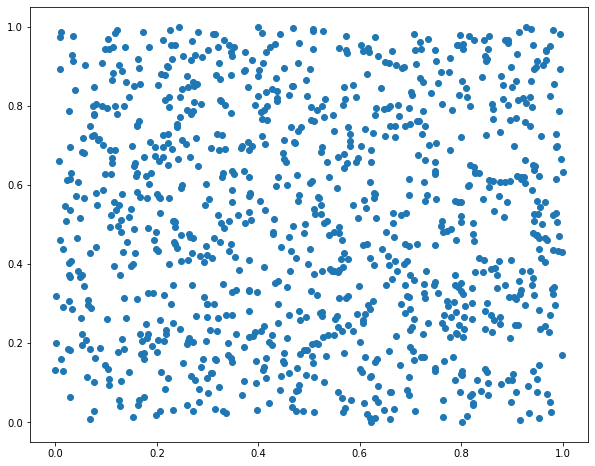

In [161]:
from matplotlib import pyplot as plt
x = []
y = []
xstart = 1
m = 2147483647
for i in range(1000):
    X_n1 = generate(xstart)
    y.append(((generate(X_n1+1)-1)/(m-2)))
    x.append((X_n1-1)/(m-2))
    xstart =X_n1

fig, ax = plt.subplots(figsize = (10,8))

plt.scatter(x,y)
plt.show()

# Проверим гипотезу равномерности критерием Колмагорова и Пирсона


In [162]:
#скопируем выборку для проверки гипотезы
selection = x[:]
no_sort_selection= x[:]

selection = np.array(selection)
selection.sort()

In [163]:
import numpy as np
import math as m
from  scipy  import stats


Lenght  = selection.size # длинна выборки
Ex =  np.mean(selection)
Std = np.std(selection, ddof =1)
print('Размер выборки - ',Lenght)
print('Матиматическое ожидание', Ex) # выборочная средняя
print('Среднеквадратическое отклонение - {0}'.format(Std))

Размер выборки -  1000
Матиматическое ожидание 0.5071931990308592
Среднеквадратическое отклонение - 0.286063020653445


## Построим ЭФР

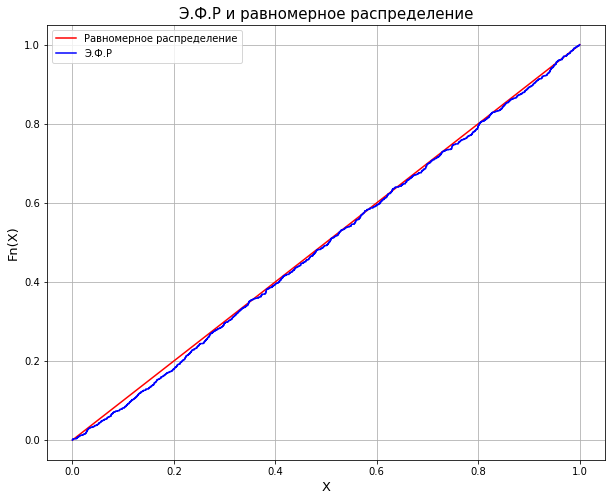

In [164]:
from statsmodels.distributions.empirical_distribution import ECDF

fig, ax = plt.subplots(figsize = (10,8))
mu , sigma = Ex, Std # мат ожидание и дисперсия
rv_normal = stats.uniform(0, 1)
X = np.linspace(0,1,1000)
cdf = rv_normal.cdf(X) # нормальная функция распределения
ax.plot(X,cdf,'r')
ecdf = ECDF(selection)
ax.step(ecdf.x,ecdf.y, where = 'post', c ='b')
ax.grid()
ax.set_title('Э.Ф.Р и равномерное распределение',fontsize = 15)
plt.legend(['Равномерное распределение','Э.Ф.Р'])
plt.ylabel('Fn(X)', fontsize= 13)
plt.xlabel('X',fontsize =13)

plt.show()

## Критерий Колмагорова

In [166]:
import math as m
mu , sigma = Ex, Std # мат ожидание и дисперсия
rv_normal = stats.uniform(0, 1)
n = 1000

Dn= []
R = []
for i in range(n):
    R.append(m.fabs(ecdf(selection[i]) - rv_normal.cdf(selection[i])))
    Dn.append(max([m.fabs((i/n) - rv_normal.cdf(selection[i])), m.fabs(rv_normal.cdf(selection[i])-((i-1)/n)) ]))

print("Результат", max(R))
print("Результат", max(Dn))
p1 = 0.90
p2 = 0.95
print('Квантиль распределения Колмагорова для n = 1000 c доверительной вероятностью 0.90', stats.ksone.ppf(p1,1000))
print('Квантиль распределения Колмагорова для n = 1000 c доверительной вероятностью 0.95', stats.ksone.ppf(p2,1000))


Результат 0.020979287520953405
Результат 0.022979287520953406
Квантиль распределения Колмагорова для n = 1000 c доверительной вероятностью 0.90 0.03376388231645533
Квантиль распределения Колмагорова для n = 1000 c доверительной вероятностью 0.95 0.038533841268045536


#### Результаты 2 формул меньше чем квантили распределения Колмагорова - следовательно гипотезу НЕ отвергаем

## Критерий пирсона

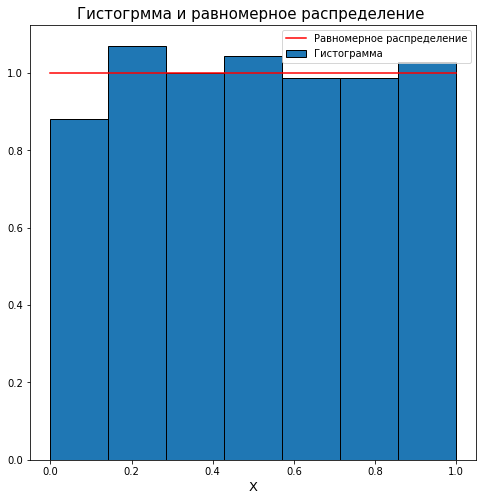

In [167]:
fig, ax = plt.subplots(figsize = (8,8))
ax.hist(selection, bins = 7, density = True,edgecolor = 'k')
mu, sigma = Ex, Std
rv_normal = stats.uniform(0, 1)
x = np.linspace(0,1,1000)
pdf = rv_normal.pdf(x)
ax.plot(x,pdf,'r')
ax.set_title('Гистогрмма и равномерное распределение ',fontsize = 15)
plt.legend(['Равномерное распределение','Гистограмма'])
plt.xlabel('X',fontsize =13)
plt.show()

In [168]:
# Разделим выборку на 5 равных интервалов
X = np.linspace(min(selection), max(selection), 6)
N = []
for n in range(5):
    k = 0
    if n!=6:
        for i in no_sort_selection:
            if X[n] <= i<=X[n+1]:
                k+=1
    N.append(k)
print(X)
# Количество элементов в интервале
print('n1 = {0} n2 = {1} n3 = {2} n4 = {3} n5 ={4}   '.format(N[0], N[1],N[2],N[3], N[4]))

[7.82636927e-06 2.00001877e-01 3.99995929e-01 5.99989980e-01
 7.99984031e-01 9.99978082e-01]
n1 = 179 n2 = 216 n3 = 200 n4 = 200 n5 =205   


In [169]:
mu, sigma = Ex, Std
rv_normal = stats.uniform(0, 1)
p1 = 0.90
p2 = 0.95
n = 1000
SumX = 0 # будем хранить статистику пирсона
p=[]
p.append(rv_normal.cdf(X[1]) - rv_normal.cdf(-float('inf')))
for i in range(1,4):
    k = (rv_normal.cdf(X[i+1]) - rv_normal.cdf(X[i]))
    p.append(k)
p.append(rv_normal.cdf(float('inf')) - rv_normal.cdf(X[4]))

print('Вероятность поподания н.р. с.в. в интервалы\n',p)
print('Сумма вероятностьей = ', sum(p))


for i in range(5):
    SumX += ((N[i]-n*p[i])**2)/(n*p[i])
print('Статистика Пирсона = ',SumX)

from scipy.stats import chi2
chi21 = chi2.ppf(p1, df = 5-1-2)
chi22 = chi2.ppf(p2, df = 5-1-2)
print('Квантиль хи - квадрат распределения с доверительной вероятностью 0.90 =',chi21)
print('Квантиль хи - квадрат распределения с доверительной вероятностью 0.95 =',chi22)



Вероятность поподания н.р. с.в. в интервалы
 [0.2000018774531808, 0.19999405108391408, 0.199994051083914, 0.1999940510839141, 0.20001596929507703]
Сумма вероятностьей =  1.0
Статистика Пирсона =  3.610556934278673
Квантиль хи - квадрат распределения с доверительной вероятностью 0.90 = 4.605170185988092
Квантиль хи - квадрат распределения с доверительной вероятностью 0.95 = 5.991464547107979


#### Статистика Пирсона меньше чем квантили хи-квадрат распределения - следовательно гипотезу не отвергаем

## Попробуем "сбить" датчик случайных чисел и проверим гипотезу снова
в функции изменим значения a и m

In [189]:
from math import *
xstart = 1

def generate2(X_n):
    a = 19
    m = 34945
    c = 0
    X_n1 = (a*X_n + c)%m
    return X_n1

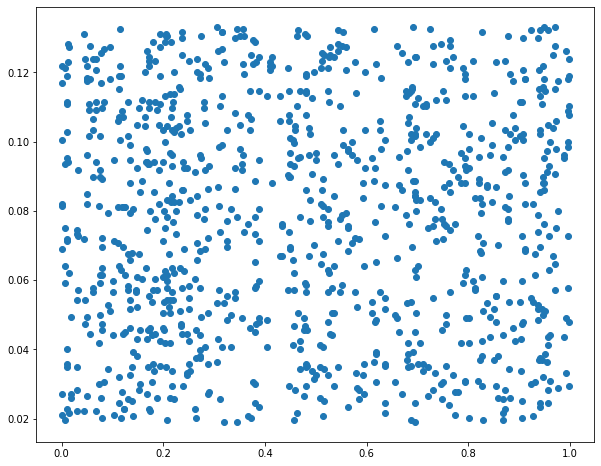

In [191]:
from matplotlib import pyplot as plt
from random import randint
x = []
y = []
xstart = 13
m = 34945
for i in range(1000):
    X_n1 = generate2(xstart)
    y.append(((generate2(randint(35,245))-1)/(m-2)))
    x.append((X_n1-1)/(m-2))
    xstart =X_n1

fig, ax = plt.subplots(figsize = (10,8))

plt.scatter(x,y)
plt.show()

После изменения чисел a m стали заметны изменения в квадрате: появивились полосы проверим равномерность это при помощи критерия Колмагорова


In [192]:
#скопируем выборку для проверки гипотезы
selection = x[:]
no_sort_selection= x[:]

selection = np.array(selection)
selection.sort()

In [193]:
Lenght  = selection.size # длинна выборки
Ex =  np.mean(selection)
Std = np.std(selection, ddof =1)
print('Размер выборки - ',Lenght)
print('Матиматическое ожидание', Ex) # выборочная средняя
print('Среднеквадратическое отклонение - {0}'.format(Std))

Размер выборки -  1000
Матиматическое ожидание 0.4769988266605615
Среднеквадратическое отклонение - 0.30040892479842307


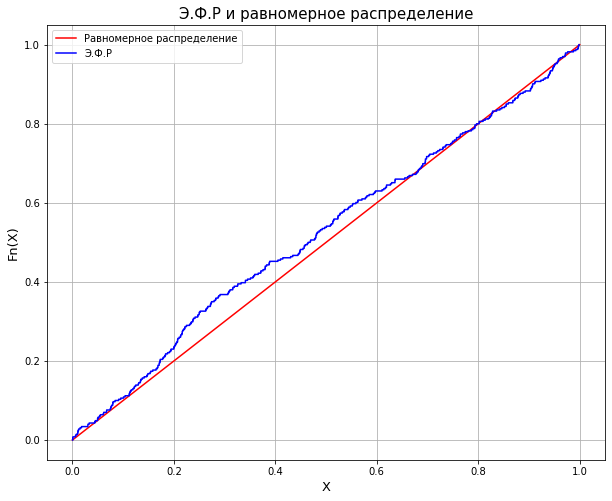

In [194]:
fig, ax = plt.subplots(figsize = (10,8))
mu , sigma = Ex, Std # мат ожидание и дисперсия
rv_normal = stats.uniform(0, 1)
X = np.linspace(0,1,1000)
cdf = rv_normal.cdf(X) # нормальная функция распределения
ax.plot(X,cdf,'r')
ecdf = ECDF(selection)
ax.step(ecdf.x,ecdf.y, where = 'post', c ='b')
ax.grid()
ax.set_title('Э.Ф.Р и равномерное распределение',fontsize = 15)
plt.legend(['Равномерное распределение','Э.Ф.Р'])
plt.ylabel('Fn(X)', fontsize= 13)
plt.xlabel('X',fontsize =13)

plt.show()

In [195]:
import math as m
mu , sigma = Ex, Std # мат ожидание и дисперсия
rv_normal = stats.uniform(0, 1)
n = 1000

Dn= []
R = []
for i in range(n):
    R.append(m.fabs(ecdf(selection[i]) - rv_normal.cdf(selection[i])))
    Dn.append(max([m.fabs((i/n) - rv_normal.cdf(selection[i])), m.fabs(rv_normal.cdf(selection[i])-((i-1)/n)) ]))

print("Результат", max(R))
print("Результат", max(Dn))
p1 = 0.90
p2 = 0.95
print('Квантиль распределения Колмагорова для n = 1000 c доверительной вероятностью 0.90', stats.ksone.ppf(p1,1000))
print('Квантиль распределения Колмагорова для n = 1000 c доверительной вероятностью 0.95', stats.ksone.ppf(p2,1000))


Результат 0.07706905531866182
Результат 0.07606905531866182
Квантиль распределения Колмагорова для n = 1000 c доверительной вероятностью 0.90 0.03376388231645533
Квантиль распределения Колмагорова для n = 1000 c доверительной вероятностью 0.95 0.038533841268045536


#### Результаты 2 формул больше чем квантили распределения Колмагорова - следовательно гипотезу отвергаем